# Datascience Project - UFO's
Jesse Pols, Bart van Tongeren

## Inleiding
Dit project is voor het vak Data Science. Het is de bedoeling dat we een dataset betreffend UFO’s gaan analyseren en daar conclusies uit gaan trekken.

De bijgeleverde dataset bevat onderzoeksdata betreft UFO-waarnemingen over de hele wereld. Het gaat dan onder andere om de vorm van de UFO, hoelang hij zichtbaar was, en de kleine omschrijving van degene die hem heeft gezien. We mogen er vanuit gaan dat de dataset 90% betrouwbaar is.

## Importeren
Als eerst gaan we alle benodigde libraries importeren. We maken gebruik van numpy om snel ingewikkelde berekeningen uit te kunnen voeren. We maken gebruik van pandas om de dataset te analyseren.

In [1]:
import pandas as pd
import numpy as np
%pip install reverse_geocoder
import reverse_geocoder as rg

# Voor de map
import matplotlib.pyplot as plt
%conda update -n base -c defaults conda
%conda install -c conda-forge cartopy
import cartopy.crs as ccrs 

Note: you may need to restart the kernel to use updated packages.
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Anaconda3

  added / updated specs:
    - conda


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.8.2                |           py37_0         2.8 MB
    ------------------------------------------------------------
                                           Total:         2.8 MB

The following packages will be SUPERSEDED by a higher-priority channel:

  conda                                         conda-forge --> pkgs/main




conda-4.8.2          | 2.8 MB    |            |   0% 
conda-4.8.2          | 2.8 MB    | 2          |   2% 
conda-4.8.2          | 2.8 MB    | ##3        |  24% 
conda-4.8.2          | 2.8 MB    | ####4      |  45% 
conda-4.8.2          | 2.8 MB    | ######6    |  66% 
conda-4.8.2          | 2.8 MB    | 

## Inlezen
Vervolgens gaan we de dataset inlezen. Het ufo.csv bestand staan in hetzelfde mapje als dit document.
Met ufoDataSet.head() maken we de dataset zichtbaar.

In [2]:
ufoDataSet = pd.read_csv("ufo.csv", dtype={"duration(seconds)": int}, low_memory = False)
ufoDataSet.head(20)

,Unnamed: 0,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,visit (seconds)
0,0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111,255
1,1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082,307
2,2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667,280
3,3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833,202
4,4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611,255
5,5,10/10/1961 19:00,bristol,tn,us,sphere,300,5 minutes,My father is now 89 my brother 52 the girl wit...,4/27/2007,36.5950000,-82.188889,298
6,6,10/10/1965 21:00,penarth (uk/wales),NaN,gb,circle,180,about 3 mins,penarth uk circle 3mins stayed 30ft above m...,2/14/2006,51.434722,-3.180000,279
7,7,10/10/1965 23:45,norwalk,ct,us,disk,1200,20 minutes,A bright orange color changing to reddish colo...,10/2/1999,41.1175000,-73.408333,227
8,8,10/10/1966 20:00,pell city,al,us,disk,180,3 minutes,Strobe Lighted disk shape object observed clos...,3/19/2009,33.5861111,-86.286111,257
9,9,10/10/1966 21:00,live oak,fl,us,disk,120,several minutes,Saucer zaps energy from powerline as my pregna...,5/11/2005,30.2947222,-82.984167,329


## Cleaning Data Set
Voor we de dataset kunnen gebruiken moeten we hem eerst schoonmaken. De dataset staat vol met waardeloze en lege informatie, wat we allemaal weg kunnen gooien.

In de vorige stap hebben we kunnen zien dat er een column genaamd "Unnamed: 0" bestaat. Deze column is voor ons project niet bruikbaar en kan weggegooid worden.

In [3]:
# Get all columns
allColumns = ufoDataSet.columns

#Get an overview of all missing values before cleaning
ufoDataSet.isnull().sum()

#Determine country
for line, row in enumerate(ufoDataSet.itertuples()):  
    if(pd.isnull(row.country)):
        try:
            lat = float(ufoDataSet.iloc[line][10])
            long = float(ufoDataSet.iloc[line][11])
        
            coordinates = (lat, long)
            country_ = rg.search(coordinates,mode=1)[-1]['cc']
            ufoDataSet.set_value(row.Index, 'country', country_)
        except:
            continue
    
ufoDataSet.head(200)
    
#Determine state
ufoDataSet['state'] = ufoDataSet['state'].fillna('Not available in this country')

#Missing values at duration (hours/min) from seconds to hours calcalution
ufoDataSet['duration (hours/min)'] = ufoDataSet['duration (hours/min)'].replace('?', 0)
ufoDataSet['duration (hours/min)'] = ufoDataSet['duration (hours/min)'].fillna(0)
ufoDataSet['duration (hours/min)'] = ufoDataSet['duration (hours/min)'].replace('unknown', 0)
    
#Shape
ufoDataSet['shape'] = ufoDataSet['shape'].replace(np.nan, 'NB')
ufoDataSet['shape'] = ufoDataSet['shape'].replace('unknown', 'NB')

#Comments -> if no value, then set to Not-specified
ufoDataSet['comments'] = ufoDataSet['comments'].replace(np.nan, 'No comments')




Loading formatted geocoded file...


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  app.launch_new_instance()


In [4]:
# Hier checken we hoeveel null-waardes er nog in de dataset te vinden zijn.
# Een 1 of een 2 hier en daar is niet erg.
ufoDataSet.isnull().sum()

Unnamed: 0              0
datetime                0
city                    0
state                   0
country                 1
shape                   0
duration (seconds)      2
duration (hours/min)    0
comments                0
date posted             0
latitude                0
longitude               0
visit (seconds)         0
dtype: int64

## Data exploration & analysis
We hebben de dataset schoongemaakt. We gaan hem nu analyseren.

In [5]:
columnCount = ufoDataSet.shape[1]
rowCount = ufoDataSet.shape[0]

print("Er zijn {} columns in de schoongemaakte dataset.".format(columnCount))
print("Er zijn {} rows in de schoongemaakte dataset.".format(rowCount))

Er zijn 13 columns in de schoongemaakte dataset.
Er zijn 88679 rows in de schoongemaakte dataset.


Dit zijn de columns die wij het belangrijkst vinden voor het trekken van conclusies.
- Latitude
- Longitude
- Duration(seconds)
- Visit
- Datetime

Eerst willen we weten welke vormen (Shapes) er het vaakst waar worden genomen.

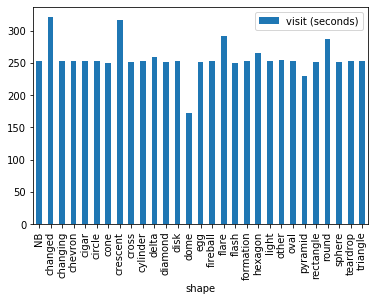

In [6]:
ufoDataSet.groupby('shape')['visit (seconds)'].mean().plot(kind='bar', legend=True)

Daarnaast willen we weten in welke landen er het vaakst ufo's waar worden genomen.

In [12]:
mostUfoSightingsCountry = ufoDataSet['country'].value_counts().idxmax()
mostUfoSightingsState = ufoDataSet['state'].value_counts().idxmax()
print("Het land waar de meeste UFO's zijn waargenomen is '{}'".format(mostUfoSightingsCountry))
print("De staat waar de meeste UFO's zijn waargenomen is '{}'".format(mostUfoSightingsState))

Het land waar de meeste UFO's zijn waargenomen is 'us'
De staat waar de meeste UFO's zijn waargenomen is 'ca'


Hierboven hebben we geconcludeert dat de United States de meeste UFO waarnemingen heeft gehad. We gaan nu per staat kijken waar de meeste ufo's zijn gespot.

Wrong
[-82.863 -46.413 -46.164 ...  71.021  71.388  72.7  ]
[-176.658 -173.985 -170.479 ...  178.     178.018  178.442]


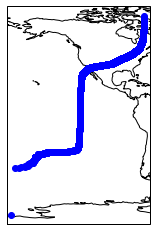

In [48]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

# Eerst halen we alle latitude & longitude waardes uit de dataset.
# We zijn alleen geïnteresseerd in de latitudes en longitudes die binnen de United States zijn te vinden.
latitudes = ufoDataSet["latitude"].to_numpy()
longitudes = ufoDataSet["longitude"].to_numpy()

intLatitudes = []
intLongitudes = []

for lat, long in zip(latitudes, longitudes):
    try:
        intLatitudes.append(float(lat))
        intLongitudes.append(float(long))
    except ValueError:
        print("Wrong")

intLatitudes = np.around(intLatitudes, decimals=3)
intLongitudes = np.around(intLongitudes, decimals=3)

intLatitudes = np.unique(intLatitudes)
intLongitudes = np.unique(intLongitudes)

print(intLatitudes)
print(intLongitudes)

# Vervolgens loopen we door de latitudes & longitudes, en plaatsen we een stip op elke coordinaten set
for lat, long in zip(intLatitudes, intLongitudes):
    plt.plot([long], [lat], color='blue', linewidth=2, marker='o', transform=ccrs.PlateCarree())

plt.show()